In [ ]:
%matplotlib inline

# Time domain averaging: Atmospheric tides

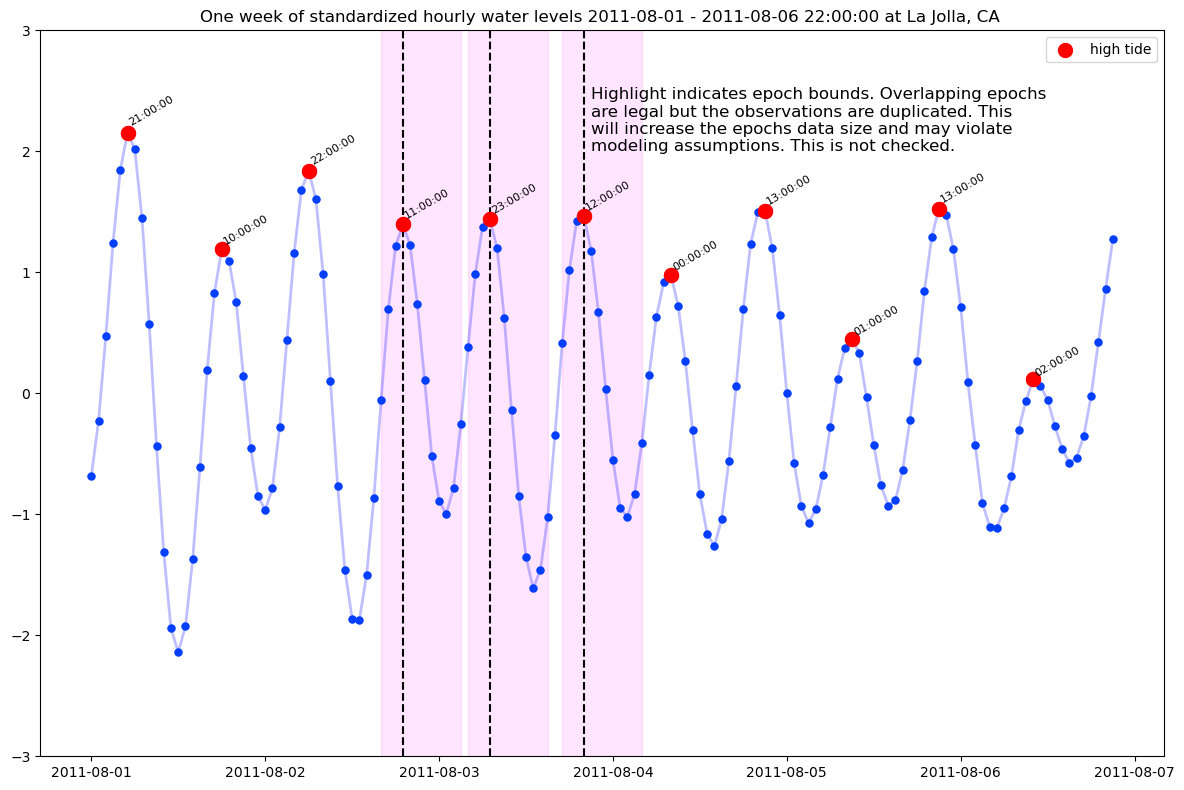

Dawson introduced the summation procedure for detecting tiny but
regular time-varying brain responses to stimulation embedded in the
irregular fluctuations of background EEG ([Dawson1954]_). He noted
that the idea of aggregating noisy measurements was already well known
and pointed to Laplace's early 19th century attempt to detect tiny but
regular lunar gravitational pressure tides in the atmosphere, embedded
in the larger fluctuations of barometric pressure driven by other
factors, e.g., solar warming, weather systems, seasonal variation.

The subject of atmospheric lunar tides is complex and has a rich
scientific history ([LinCha1969]_).  This example it is not a
serious model of the phenomenon, but rather an illustration of
how event-related regression modeling, in this case simple
averaging, can "see through" large unsystematic variation
and find systematic time-varying patterns.

Data are from NOAA Station La Jolla, CA 94102 (Scripps) August 1, 2010
- July 1, 2020 sea level and meteorology data, downloaded January 29,
2020 from
`https://tidesandcurrents.noaa.gov <https://tidesandcurrents.noaa.gov/waterlevels.html?id=9410230>`_.
Water levels are measured relative mean sea level (MSL). For more on 
how the epochs data were prepared see `noaa_epochs`.


In [ ]:
from pathlib import Path
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from matplotlib import pyplot as plt
import fitgrid as fg
from fitgrid import DATA_DIR

# set up plotting
plt.style.use("seaborn-bright")
rc_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# supress datetime FutureWarning (ugh)
# register_matplotlib_converters()

# path to hourly water level and meteorology data
WDIR = DATA_DIR / "CO-OPS_9410230"

data = pd.read_hdf(DATA_DIR / "CO-OPS_9410230.h5", key="data")
epochs_df = pd.read_hdf(DATA_DIR / "CO-OPS_9410230.h5", key="epochs_df")
epochs_df.drop(columns=["air_temp", "air_temp_z"], inplace=True)

# compute epochs time domain average
epochs_tda = epochs_df.groupby('time').mean().reset_index('time')

## Event-related data modeling

Epochs are segments of recorded data, time stamped relative to an event of interest.

For this illustration:

* The data channels include water level (meters), barometric
* pressure (mm Hg) recorded hourly at Scripps Pier in La Jolla and
  the standardized scores (centered, scaled by the standard deviation).
* For comparing the measured time-series data with random variation,
  an additional channel is created with a sequence of values sampled
  from a standard normal distribution.
* The epochs segments are 12 measurements beginning 3 hours before high tide at
  Time (hour) = 0.




The epochs data frame looks like this:



In [ ]:
epochs_df

The first few hundred epochs are shown (thin lines), along with the overall 10 year average (thick line).



In [ ]:
measures = ['water_level_z', 'mm_hg_z', 'std_noise_z']
alpha = 0.025

fig, axs = plt.subplots(len(measures), 1, figsize=(8, 8), sharey=True)
cnt = 0

# select a batch of individual epochs for illustration
epids = epochs_df.index.unique("epoch_id")[:512]
for _, vals in epochs_df.query("epoch_id in @epids").groupby('epoch_id'):
    vals.reset_index('time', inplace=True)
    for axi, measure in enumerate(measures):
        axs[axi].plot(
            vals['time'], vals[measure], color=rc_colors[axi], alpha=alpha
        )

# overplot the 10 year time-domain average
for axi, measure in enumerate(measures):
    if axi == 0:
        axs[axi].text(x=0, y=4.25, s="high tide", ha="center")
    axs[axi].axvline(0, color="k", ls="--")
    axs[axi].set_title(measure)
    axs[axi].plot(
        epochs_tda['time'], epochs_tda[measure], color=rc_colors[axi], lw=2
    )
    axs[axi].set(xlabel="Time (hours)", ylabel="Standard Deviation (SD)")
fig.tight_layout()

The time course of the water levels (blue) shows epoch-to-epoch
variation and, by construction, the rise and fall around the peak at
high tide (Time = 0) for individual epochs and on average.

The barometric atmospheric pressure data (green) are also time-aligned to high
tide. They vary from epoch to epoch but individual epochs vary little over
time and the 10-year average appears approximately flat.

The standard normal data (red) are shown for comparison. Unlike the water levels, the
amplitude variation over time is not systematic and the 10 year average appears approximately flat.



The next figure shows these same 10-year averages. The oceanic tide is obvious but there is no clear indication
of a corresponding atmospheric tide. On average, the barometric
pressure looks not much different than the random variation.



In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
for midx, meas in enumerate(measures):
    ax.plot(epochs_tda.time, epochs_tda[meas], color=rc_colors[midx])
ax.legend(measures)
ax.set(ylabel="Standard Deviation (SD)")
ax.set_title(f"10-year Time-domain average in standard units")
fig.tight_layout()

This appearance, however, is misleading. When the 10-year
averages are normalized by their range there is a clear barometric
rise and fall at about a two-hour delay relative to water
level. The scaled average random variation shows no such
pattern. The barometric measurements of the lunar atmospheric tide
are an order of magnitude smaller than the water level measurements
but detectable none the less with enough data to average out the
large but irregular sources of pressure variation.



In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
for midx, meas in enumerate(measures):
    meas_range = epochs_tda[meas].max() - epochs_tda[meas].min()
    ax.plot(
        epochs_tda.time, epochs_tda[meas] / meas_range, color=rc_colors[midx]
    )
ax.legend(measures)
ax.set(ylabel="Standard Deviation/(max - min)")
_ = ax.set_title(f"10-year Time-domain averages range normalized")

The time-domain average event-related brain potential (ERP) as
shown below for visual words presented 2 per second is computed the
same way.

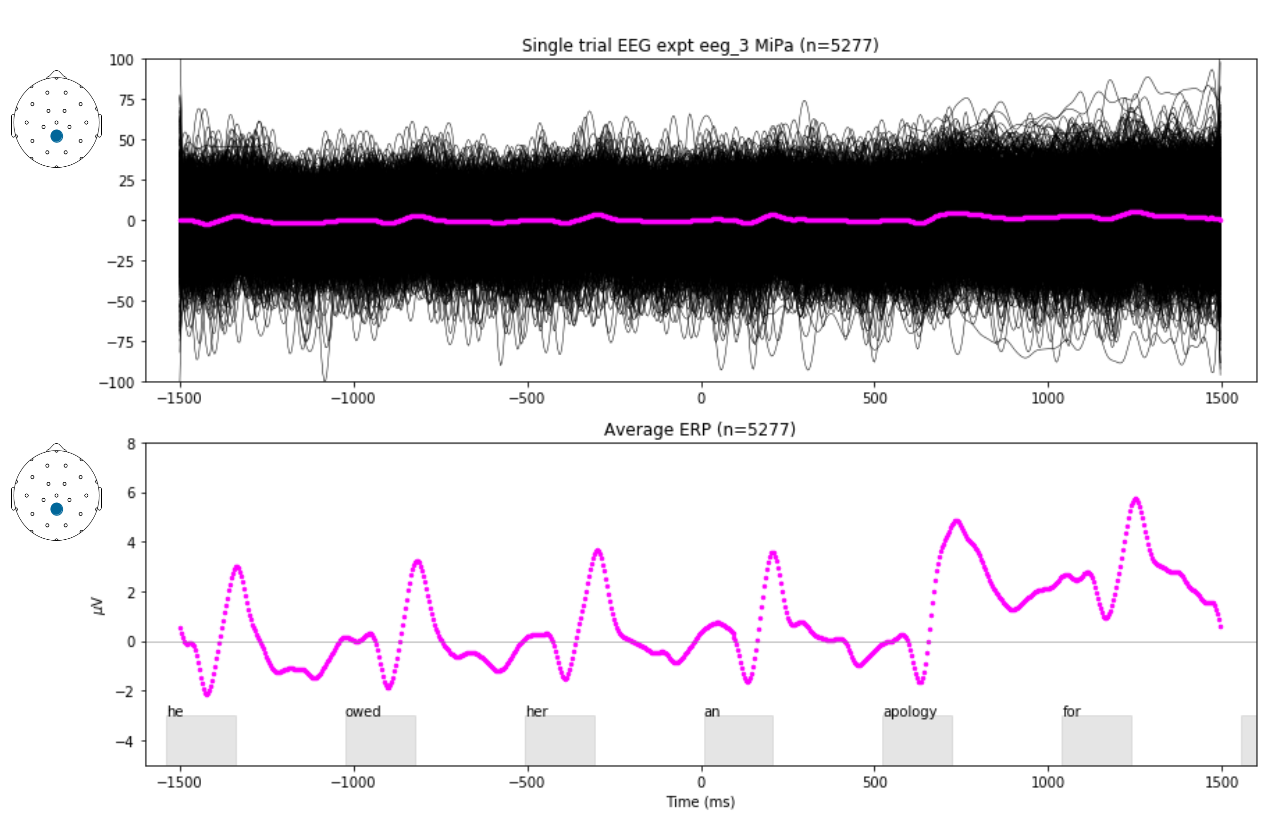


